# Snippet Creator and Hacking Space 

Hacking space. 

Use snippets.py (previously dm.py) or whatever for the code... 

## Provenance

* dm.ipynb renamed snippet_runner.ipynb to coordinate with snippets.py
* Moved into agg project, untracked June 28, 2022
* Created new as Learning_SLY June 23, 2022

In [ ]:
# see the parser
%run aggregate/parser.py

In [ ]:
agg.parser.UnderwritingParser.enhance_debugfile()

In [ ]:
logger_level(30)
%run -i snippets.py

In [ ]:
# save grammar 
agg.grammar()

In [ ]:
test = build('agg TEST dfreq [1 2 3 4] dsev [1 2 5 10]')
test

In [ ]:
test.report_df

# NewCo Re Capital Model

## Effect on the tail of adding cat...really depends on the relative vol of non-cat.

In [ ]:
logger_level(30)
%run -i snippets.py 
# %run -i snippets.py parse_tests

In [ ]:
porta = build('''
port newco
    agg NonCatAndReserves 1 claim sev gamma 27000 cv 0.05 fixed
    agg Cat               1 claim sev lognorm  500 cv 0.500 fixed
''', log2=17, bs=1, padding=1)

portb = build('''
port newco
    agg NonCatAndReserves 1 claim sev gamma  27000 cv .01 fixed
    agg Cat               1 claim sev lognorm  500 cv 0.500 fixed
''', log2=17, bs=1, padding=2)

In [ ]:
porta.plot()

In [ ]:
portb.plot()

In [ ]:
%%sf 1 2 8 8 
porta.biv_contour_plot(f, ax0, 0, 40e3, 1e3, cmap='viridis')
portb.biv_contour_plot(f, ax1, 0, 40e3, 1e3, cmap='viridis')

## Cat / Non-Cat Capital Model Case: New Syntax

In [ ]:
logger_level(30)
%run -i snippets.py

In [ ]:
prog_noncat = 'agg NC 1 claim sev gamma 6840 cv 0.037 # 19500 fixed'
noncat = build(prog_noncat)
noncat.report_df

In [ ]:
prog_cat_gross = 'agg CAT [26.144 2] claims sev lognorm [40 100] cv [1.7 2.5] mixed gamma 0.4'
cat = build(prog_cat_gross, log2=18, bs=1)
cat.report_df

In [ ]:
prog_cat_net = 'agg CAT [26.144 2] claims sev lognorm [40 100] cv [1.7 2.5] occurrence net of 1000 x 400 mixed gamma 0.4 aggregate net of 1325 xs 2000'
net = build(prog_cat_net, log2=18, bs=1)
net.report_df

In [ ]:
cat.q(0.9),cat.q(0.99), cat.q(0.996), cat.q(0.999), net.q(0.9), net.q(0.99), net.q(0.996), net.q(0.999)

In [ ]:
# blend calibration
# A- bond, default 5 bps, spread 195 bps over treasuriesw
# most recent cat bond EL 0.009, spread 0.053
# cat bonds average el 4.2% at 8.5%
# s_values = [0.0005, 0.009, 0.042]
# y = np.array([0.0195, 0.042, 0.085])
s_values = [0.0005, 0.009]
y = np.array([0.0195, 0.042])
gs_values = y / (1+y)

In [ ]:
a, prem = catco.pricing_summary.loc[['a', 'P'], 'gross']
a, prem

In [ ]:
ans

In [ ]:
ans = catco.gross.calibrate_blends(a, prem, s_values, gs_values, debug=True)

In [ ]:
catco.dist_dict[list( catco.dist_dict.keys() )[-1]].plot(both=False)

In [ ]:
%%sf 1 4 4 4 
for k, v in catco.blend_distortions.items():
    ax = next(axi)
    v.plot(ax=ax, both=False, lw=1)
    ax.set(title=k)
ax = next(axi)
catco.blend_d.plot(ax=ax, both=False, lw=1)
ax.set(title=
      'Blend-d')

In [ ]:
%%sf 1 4 4 4 
g = agg.Distortion('ph', 0.5)
for k, v in ans[3].items():
    ax = next(axi)
    g.g = v
    g.plot(ax=ax, both=False, lw=1)
    ax.set(title=k)

In [ ]:
catco = cs.CaseStudy()
catco.factory(case_id='CatCo',
                   case_name='CatCo Capital Model',
                   case_description='CatCo capital model calibrated to S&P',
                   a_distribution       = prog_noncat,
                   b_distribution_gross = prog_cat_gross,
                   b_distribution_net   = prog_cat_net,
                   reg_p=0.99995,      # backed into number so the net capital is correct
                   roe=0.085,
                   d2tc=0.281118428,    # to get about the right amount of debt
                   f_discrete=False, 
                   s_values=s_values,
                   gs_values=gs_values,
                   bs=1,
                   log2=18,
                   padding=1)
catco.to_json()

In [ ]:
catco.full_monty()

In [ ]:
catco.show_extended_graphs()

In [ ]:
mrr = cs.ManualRenderResults(catco)

In [ ]:
# custom for this analysis
mrr.render_custom('F', 'A', 'N', 'M', 'O', 'V', 'E', 'Z*', 'B')

In [ ]:
catco.show_extended_graphs()

# Define severity as a mixture?

In [ ]:
out = build('sev Atest [10 30 100 300 1000] @ expon 1 wts [.4 .2 .2 .1 .1]')

In [ ]:
out

In [ ]:
a = build('agg Amixed 10 claim sev.Atest poisson', log2=16, bs=.5)
a

In [ ]:
a.report_df

In [ ]:
a.plot()

In [31]:
port = catco.net

time: 0 ns (started: 2022-07-12 21:33:21 -04:00)


In [32]:
port

,CAT,NC,total
"(freq, mean)",28.144,1.000,29.144
"(sev, mean)",44.264,26.340k,946.533
"(agg, mean)",1.246k,26.340k,27.586k
"(freq, cv)",442.189m,0.000,427.017m
"(sev, cv)",2.140,9.608m,5.058
"(agg, cv)",598.568m,9.608m,28.546m
"(freq, skew)",804.025m,NaN,804.025m
"(sev, skew)",34.464,74.000m,5.115
"(agg, skew)",2.758,74.000m,2.345
Mean,1.246k,26.340k,27.586k


time: 0 ns (started: 2022-07-12 21:33:22 -04:00)


In [34]:
sdir(port)

CAT                     EX_accounting_economic_balance_sheet    EX_allocated_capital_comparison EX_basic_loss_statistics
EX_distortion_calibration       EX_distortion_information       EX_loss_ratio_comparison        EX_margin_comparison
EX_multi_premium_capital        EX_natural_allocation_summary   EX_premium_capital
EX_return_on_allocated_capital_comparison       NC                      accounting_economic_balance_sheet       add_exa
agg_list                analysis_collateral     analysis_priority       analyze_distortion
analyze_distortion_add_comps    analyze_distortion_plots        analyze_distortions     apply_distortion
apply_distortions       approx_freq_ge          approx_type             as_severity             assets_2_epd
audit                   audit_df                audit_percentiles       audits                  augmented
augmented_df            basic_loss_statistics   best_bucket             biv_contour_plot        bs
calibrate_blends        calibrate_distortion    c

In [35]:
catco.pricing_summary

portfolio,gross,net
stat,,
L,27.586k,27.480k
M,907.932,725.699
P,28.493k,28.205k
LR,968.135m,974.271m
Q,10.682k,8.538k
ROE,85.000m,85.000m
a,39.175k,36.743k
PQ,2.668,3.304


time: 16 ms (started: 2022-07-12 21:34:22 -04:00)


In [38]:
port.dist_ans

time: 0 ns (started: 2022-07-12 21:35:39 -04:00)


In [37]:
port.distortion_information()

AttributeError: 'NoneType' object has no attribute 'reset_index'

time: 16 ms (started: 2022-07-12 21:35:18 -04:00)


In [36]:
port.distortion

blend (0.599099)

time: 16 ms (started: 2022-07-12 21:35:10 -04:00)


In [39]:
port.make_all(a=36743)

time: 31 ms (started: 2022-07-12 21:39:03 -04:00)


In [56]:
port.multi_premium_capital([34000, 35000, 36000])

time: 78 ms (started: 2022-07-12 21:56:43 -04:00)


In [57]:
port.EX_multi_premium_capital

Assets                      $a=34000.0$                     $a=35000.0$  \
Line                                CAT        NC     Total         CAT   
Item                                                                      
1. Allocated assets              6.665k   27.335k   34.000k      7.555k   
2. Market value liability        2.132k   26.030k   28.162k      2.148k   
3. Expected incurred loss        1.140k   26.340k   27.479k      1.140k   
4. Margin                       992.503  -309.462   683.041      1.008k   
5. Loss ratio                  534.525m     1.012  975.746m    530.643m   
6. Allocated equity              4.532k    1.305k    5.838k      5.407k   
7. Cost of allocated equity    218.982m -237.106m  117.009m    186.445m   
8. Premium to surplus ratio    470.449m    19.944     4.824    397.234m   

Assets                                          $a=36000.0$            \
Line                               NC     Total         CAT        NC   
Item                                                                    
1. Allocated assets           27.445k   35.000k      8.448k   27.552k   
2. Market value liability     26.032k   28.180k      2.164k   26.034k   
3. Expected incurred loss     26.340k   27.480k      1.140k   26.340k   
4. Margin                    -307.540   700.589      1.024k  -305.673   
5. Loss ratio                   1.012  975.139m    526.820m     1.012   
6. Allocated equity            1.413k    6.820k      6.285k    1.518k   
7. Cost of allocated equity -217.691m  102.728m    162.895m -201.410m   
8. Premium to surplus ratio    18.427     4.132    344.256m    17.154   

Assets                                 
Line                            Total  
Item                                   
1. Allocated assets           36.000k  
2. Market value liability     28.198k  
3. Expected incurred loss     27.480k  
4. Margin                     718.064  
5. Loss ratio                974.535m  
6. Allocated equity            7.802k  
7. Cost of allocated equity   92.032m  
8. Premium to surplus ratio     3.614

time: 16 ms (started: 2022-07-12 21:56:57 -04:00)


In [65]:
catco.gross._distortion = catco.gross.dists['ph']

time: 15 ms (started: 2022-07-12 22:03:22 -04:00)


In [62]:
catco.gross.EX_distortion_information

,Shape Parameter
Distortion,
Dual Moment,4.568
Proportional Hazard,466.397m
roe,85.000m
Tail VaR,695.210m
Wang-normal,976.838m


time: 0 ns (started: 2022-07-12 22:02:16 -04:00)


$x \wedge x$ $\bar Q(a)$

In [ ]:
  191:         port.profit_segment_plot(a, 0.999, ['total', 'Thick', 'Thin'],
  195:         port.natural_profit_segment_plot(a, 0.999, ['total', 'Thick', 'Thin'],


In [73]:
catco.gross.line_names

['NC', 'CAT']

time: 0 ns (started: 2022-07-12 22:15:34 -04:00)


In [85]:
catco.gross

,CAT,NC,total
"(freq, mean)",28.144,1.000,29.144
"(sev, mean)",44.264,26.340k,946.533
"(agg, mean)",1.246k,26.340k,27.586k
"(freq, cv)",442.189m,0.000,427.017m
"(sev, cv)",2.140,9.608m,5.058
"(agg, cv)",598.568m,9.608m,28.546m
"(freq, skew)",804.025m,NaN,804.025m
"(sev, skew)",34.464,74.000m,5.115
"(agg, skew)",2.758,74.000m,2.345
Mean,1.246k,26.340k,27.586k


time: 15 ms (started: 2022-07-12 22:28:40 -04:00)


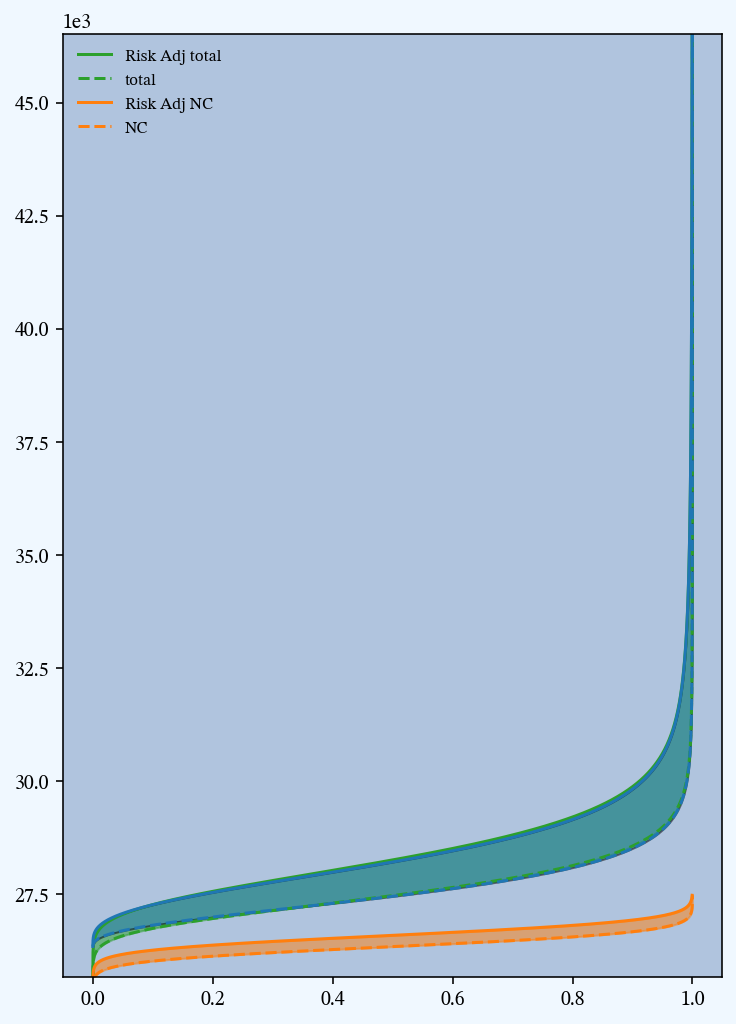

time: 297 ms (started: 2022-07-12 22:29:55 -04:00)


In [91]:
%%sf 1 1 5 7
catco.gross.profit_segment_plot(ax, 0.99999, ['total', 'CAT', 'NC'], 
                                'wang', [2,0,1], [0, 26340, 0])

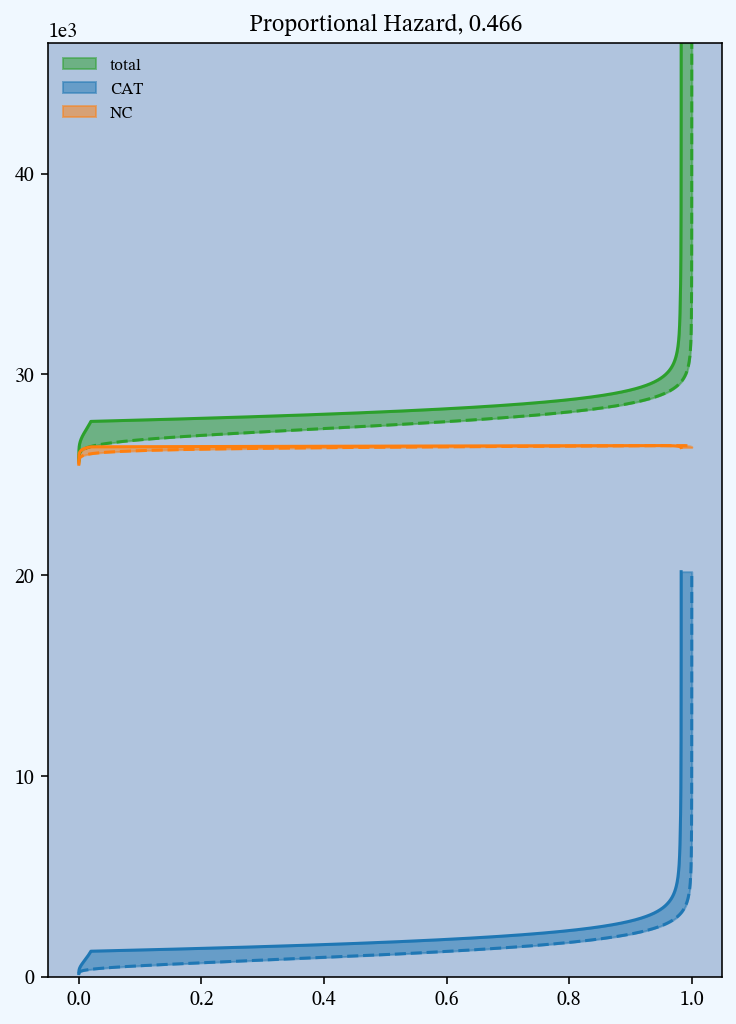

time: 547 ms (started: 2022-07-12 22:35:25 -04:00)


In [96]:
%%sf 1 1 5 7
catco.gross.natural_profit_segment_plot(ax, 0.99999, ['total', 'CAT', 'NC'], [2,0,1], [0, 0, 0])

In [97]:
catco.gross.report_df

unit,Nc,Cat,Total
statistic,,,
Freqency Mean,1.000,28.144,29.144
Freqency CV,0.000,0.442,0.427
Freqency Skewness,nan,0.804,0.804
Severity Mean,"26,340.000",44.264,946.533
Severity CV,0.010,2.140,5.058
Severity Skewness,0.074,34.464,5.115
Aggregate Mean,"26,340.000","1,245.760","27,585.760"
Aggregate emp Mean,"26,340.000","1,245.762","27,585.762"
Aggregate Mean err,-0.000,0.000,0.000


time: 15 ms (started: 2022-07-12 22:36:51 -04:00)


In [68]:
catco.gross.distortion_calibration()
catco.gross.EX_distortion_calibration

,a,LR,S(a),ι,δ,ν,EL(a),ρ(X ∧ a),Levg,𝑄¯ Q(a),ROE,Shape
Distortion,,,,,,,,,,,,
ph,39.175k,968.135m,49.999u,85.000m,78.341m,921.659m,27.586k,28.493k,2.668,10.682k,85.000m,466.397m


time: 16 ms (started: 2022-07-12 22:05:58 -04:00)


In [40]:
port.show_enhanced_exhibits()

,Statutory,Objective,Market,Difference
Item,,,,
Assets,36743,36743,36743,0
NC,1245.8,1139.8,2175.1,1035.3
CAT,26340,26340,26036,-304.31
Total,27586,27480,28211,731.02
Equity,9157.2,9263.3,8532.3,-731.02


,CAT,NC,Total
Mean,1245.759986,26340.000000,27585.759986
EmpMean,1139.916133,26340.000000,27479.916083
MeanErr,-0.084963,-0.000000,-0.003837
CV,0.598568,0.009608,0.028546
EmpCV,0.480062,0.009608,0.021940
CVErr,-0.197983,0.000001,-0.231403
Skew,2.758267,0.074000,2.344593
Kurt,193.352739,0.008216,126.147704
P99.0,2000.000000,26942.000000,28754.000000
P99.6,2262.000000,27030.000000,28928.000000


,CAT,NC,Total
Item,,,
1. Allocated assets,9113,27630,36743
2. Market value liability,2175.1,26036,28211
3. Expected incurred loss,1139.8,26340,27480
4. Margin,1035.3,-304.31,731.02
5. Loss ratio,0.52402,1.0117,0.97409
6. Allocated equity,6937.9,1594.5,8532.3
7. Cost of allocated equity,0.14923,-0.19085,0.085676
8. Premium to surplus ratio,0.31352,16.329,3.3063


time: 31 ms (started: 2022-07-12 21:39:53 -04:00)


In [70]:
port.report_df

unit,Nc,Cat,Total
statistic,,,
Freqency Mean,1.000,28.144,29.144
Freqency CV,0.000,0.442,0.427
Freqency Skewness,nan,0.804,0.804
Severity Mean,"26,340.000",44.264,946.533
Severity CV,0.010,2.140,5.058
Severity Skewness,0.074,34.464,5.115
Aggregate Mean,"26,340.000","1,245.760","27,585.760"
Aggregate emp Mean,"26,340.000","1,139.916","27,479.916"
Aggregate Mean err,-0.000,-0.085,-0.004


time: 16 ms (started: 2022-07-12 22:12:43 -04:00)
